# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of graded assignment*
- Provide your GitHub URL to the notebook as the submission for the Brightspace assignment page
- Post errors in the course Github's issue page for faster feedback
- ***DO NOT* forget to remove your review partner from your repository before you put the code in Github to avoid plagiarism**

### DEADLINE FOR THIS ASSIGNMENT IS 29 OCTOBER 2021 BEFORE 23:59

<hr />

# Assignment


In the past 7 weeks, you have been working with Google mobility data. Now, let's combine that data with covid-19 data to see if we can derive some *interesting* insights. There are multiple sources of COVID-19 data. Maybe the country that you chose has its separate data source. 
- One such data source is from [OurWorldInData](https://github.com/owid/covid-19-data/tree/master/public/data), which contains daily covid data from 217 countries and the corresponding government response measured as **stringency index**.
- Another data source that provides municipal, provincial, and nationwide covid data for the whole of **Netherlands** is [here](https://github.com/J535D165/CoronaWatchNL).

Feel free to use either of these data sources or something you found on your own!

## Part I - Data import

1. *[5 points]* Create a new dataframe

This dataframe should combine mobility data and covid-19 data of your chosen country. There are different types of covid data available such as the number of positively tested cases, hospital admission, fatality rates, government stringency index, etc. Provide a brief explanation or data dictionary of your new dataframe. Keep in mind that you need to associate these two datasets, then pick municipal, provincial, or nationwide data accordingly.

In [1]:
import pandas as pd
df_mobile = pd.read_csv('2020_CH_Region_Mobility_Report.csv')
df_covid = pd.read_excel('owid-covid-data.xlsx', sheet_name='Sheet1')

In [32]:
criterion = df_covid['iso_code'].map(lambda x: x == "CHE")
df_covid = df_covid[criterion]
criterion = df_covid['date'].map(lambda x: x < "2021-01-01")
df_covid = df_covid[criterion]
df_covid = df_covid.iloc[:, :21]
df_mobile = df_mobile.loc[12:322, ['place_id', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
df_covid.index = range(len(df_covid))
df_mobile.index = range(len(df_mobile))
new_df = df_covid.join(df_mobile)
new_df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,icu_patients_per_million,hosp_patients,hosp_patients_per_million,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CHE,Europe,Switzerland,2020-02-25,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,-10.0,-1.0,-26.0,-10.0,-1.0,4.0
1,CHE,Europe,Switzerland,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,-7.0,2.0,10.0,-6.0,-2.0,3.0
2,CHE,Europe,Switzerland,2020-02-27,8.0,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,-11.0,8.0,-1.0,-11.0,-4.0,4.0
3,CHE,Europe,Switzerland,2020-02-28,8.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,-13.0,24.0,1.0,-15.0,-6.0,5.0
4,CHE,Europe,Switzerland,2020-02-29,18.0,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ChIJYW1Zb-9kjEcRFXvLDxG1Vlw,-25.0,12.0,-6.0,-26.0,-7.0,8.0


## Part II - Data processing

### As you already know, there are various peaks/valleys in the changes of mobility activity data. In this assignment, find peaks/valleys (if available) in the covid data.

After identifying peaks from two datasets, you need to check if there are common peaks. Most likely, the peaks do not intersect on the same day, so it should be possible to provide a certain offset to combine peaks/valleys that are close to each other. A visual representation of this problem is shown in the following image:

<p align="center">
  <img src="Images/offset.png" alt="drawing" width="500"/>
</p>


Below are the challenges that need to be solved for this part:

2. *[8 points]* Provide pseudo-code or logic behind the offset algorithms that you will develop for the following questions (3. and 4.) Use bullet points/flow chart/pseudocode/other means to explain the logic.


3. *[10 points]* Find all the common peaks/valleys of mobility activity patterns of a municipality/provinces/nation within a range of time offsets. **eg: find common peaks between 1 activity of two municipalities OR find common peaks between 2 activities of the same municipality**


4. *[2 points]* Find all the common peaks/valleys of the selected covid data of municipality/provinces/nation within a range of time offsets. **eg: find common peaks between 1 type of covid data (eg. vaccinations) of two municipalities OR find common peaks between 2 types of covid data (eg. vaccinations and deaths) of the same municipality**


5. *[8 points]* Relationship between common peaks/valleys (municipal/provincial/nationwide) in activities and covid data (municipal/provincial/nationwide) (time-offset) (either through observation or using programmable logic). If you only use visual observational methods, you won't get maximum points for this question. **eg: compare peaks of 1 activity and 1 type of covid data of the same municipality OR compare common peaks of all activities and common peaks of all types of covid data of the same municipality**

**Motivate your selection for the data choice for finding the common peaks**

# Question 2
    1.begin
    2.peaks_1 = find_peaks(dataframe1)
    3.peaks_2 = find_peaks(dataframe2)
    4.common_peaks = list()
    5.for i in peaks_1:
        for j in peaks_2:
            if abs(i-j) < offset:
                common_peaks.append((i, j))
    6.return common_peaks
                

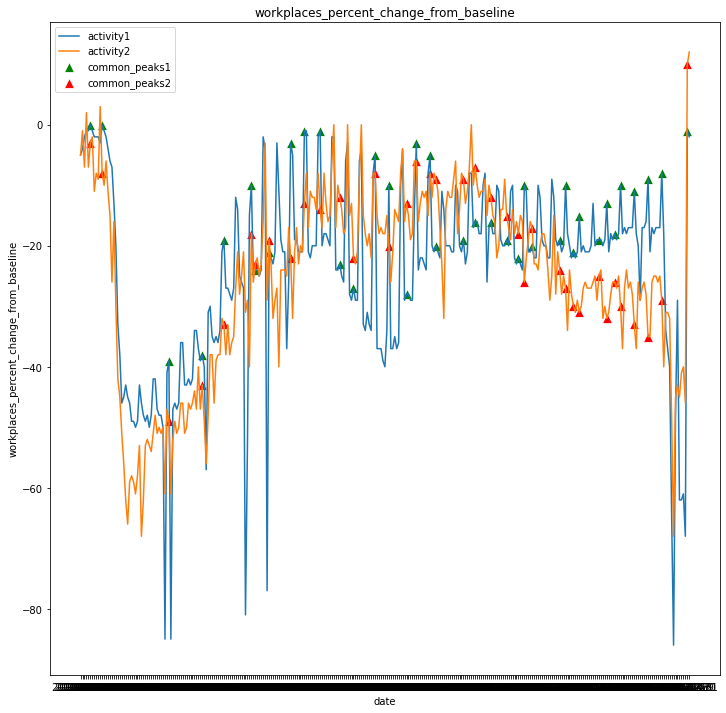

In [14]:
# Question3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def find_common_peaks(peaks1, peaks2, offset):
    common_peaks1 = list()
    common_peaks2 = list()
    for i in peaks1:
        for j in peaks2:
            if 0 < i-j < offset:
                common_peaks1.append(i)
                common_peaks2.append(j)
    return common_peaks1, common_peaks2

peaks1, _ = find_peaks(new_df['workplaces_percent_change_from_baseline'])
peaks2, _ = find_peaks(new_df['transit_stations_percent_change_from_baseline'])
common_peaks1, common_peaks2 = find_common_peaks(peaks1, peaks2, 3)
df_peak1 = new_df.iloc[common_peaks1, :]
df_peak2 = new_df.iloc[common_peaks2, :]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=new_df, label='activity1', ax=ax)
sns.scatterplot(x='date', y='workplaces_percent_change_from_baseline', data=df_peak1, label='common_peaks1', ax=ax, marker='^', color='g', s=100)
sns.lineplot(data=new_df, x='date', y='transit_stations_percent_change_from_baseline', label='activity2', ax=ax)
sns.scatterplot(x='date', y='transit_stations_percent_change_from_baseline', data=df_peak1, label='common_peaks2', ax=ax, marker='^', color='r', s=100)
plt.show()

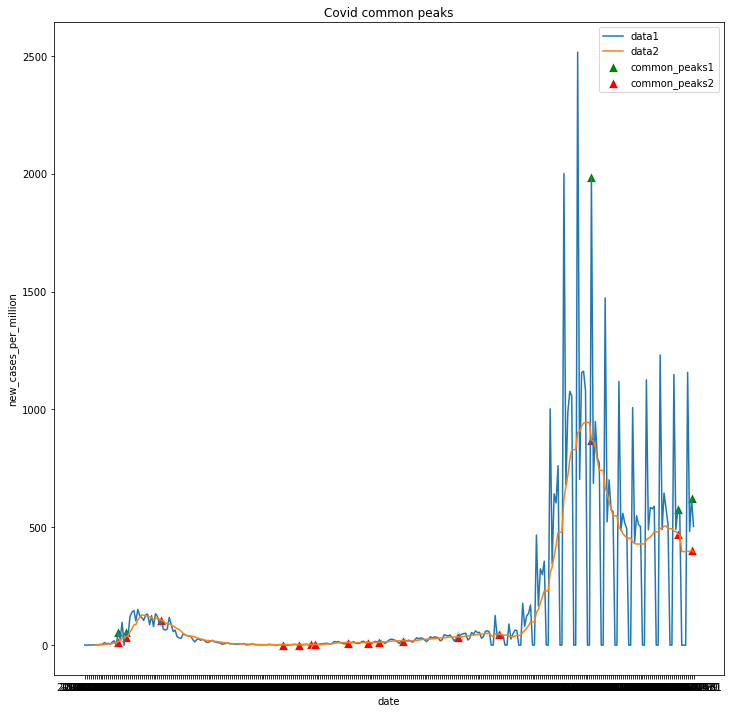

In [16]:
# Question4
peaks1, _ = find_peaks(new_df['new_cases_per_million'])
peaks2, _ = find_peaks(new_df['new_cases_smoothed_per_million'])
common_peaks1, common_peaks2 = find_common_peaks(peaks1, peaks2, 3)
df_peak1 = new_df.iloc[common_peaks1, :]
df_peak2 = new_df.iloc[common_peaks2, :]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Covid common peaks')
sns.lineplot(x='date', y='new_cases_per_million', data=new_df, label='data1', ax=ax)
sns.scatterplot(x='date', y='new_cases_per_million', data=df_peak1, label='common_peaks1', ax=ax, marker='^', color='g', s=100)
sns.lineplot(data=new_df, x='date', y='new_cases_smoothed_per_million', label='data2', ax=ax)
sns.scatterplot(x='date', y='new_cases_smoothed_per_million', data=df_peak1, label='common_peaks2', ax=ax, marker='^', color='r', s=100)
plt.show()

## Part III - Data visualisation

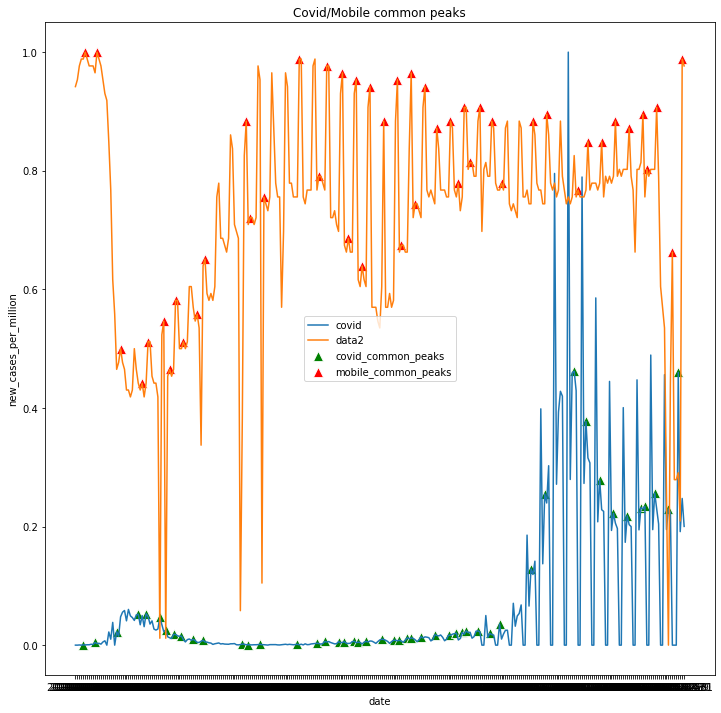

In [31]:
# Quetion5, 6
covid_df = new_df['new_cases_per_million']
covid_df = (covid_df-covid_df.min()) / (covid_df.max()-covid_df.min())

mobile_df = new_df['workplaces_percent_change_from_baseline']
mobile_df = (mobile_df-mobile_df.min()) / (mobile_df.max()-mobile_df.min())

covid_peaks, _ = find_peaks(covid_df)
mobile_peaks, _ = find_peaks(mobile_df)
mobile_common_peaks, covid_common_peaks = find_common_peaks(mobile_peaks, covid_peaks, 3)

df = new_df.copy()
df['new_cases_per_million'] = covid_df
df['workplaces_percent_change_from_baseline'] = mobile_df
covid_common_df = df.iloc[covid_common_peaks, :]
mobile_common_df = df.iloc[mobile_common_peaks, :]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Covid/Mobile common peaks')
sns.lineplot(x='date', y='new_cases_per_million', data=df, label='covid', ax=ax)
sns.scatterplot(x='date', y='new_cases_per_million', data=covid_common_df, label='covid_common_peaks', ax=ax, marker='^', color='g', s=100)
sns.lineplot(data=df, x='date', y='workplaces_percent_change_from_baseline', label='data2', ax=ax)
sns.scatterplot(x='date', y='workplaces_percent_change_from_baseline', data=mobile_common_df, label='mobile_common_peaks', ax=ax, marker='^', color='r', s=100)
plt.show()

6. *[12 points]* Use visualization to tell the mobility and covid data story of a specific municipality/province/nationwide. This is a more exploration question. Explain the logic behind your story and also your visualization choices

# Rubrics

## Overall grading

- 10% of the final grade is for code review for the final assignment. Information about partners will be released after the assignment submission deadline.

- 90% of the final grade is divided among the following categories, which vary for different questions (see image below):
    - narrative
    - coding/logic - correctness
    - readability - [pep8 standard](https://www.python.org/dev/peps/pep-0008/)

## Rubrics for each question in the assignment

Criteria:
1. Consistent dataset throughout the assignment, combined dataframe
2. Correctness, generalisability, clarity, simplicity
3. Working code, visualization of the result, generalisability
4. Generalisability
5. Logic, visualization
6. Logic, story, visuals, clarity, correctness, readability

You can obtain maximum points for the question if you have:
- Excellent stories
- Interactive visualisation 
- Programmable logic in *question 5*

You can obtain bonus points if you use:
- Extra datasets (eg: population)